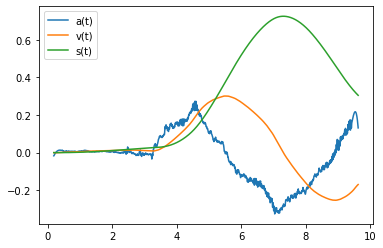

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import signal

#Laste inn fil i CSV-format til n-dimensjonalt NumPy-array
#Eksempel: laste inn CSV-fil med akselerometer-verdier fra Phyphox med 4 kolonner for t, a_x, a_y, a_z
fil=np.loadtxt('data_del1.csv',delimiter=',',skiprows=1)
t=fil[:,0]
a_z=fil[:,3]
a_y=fil[:,2]
a_x=fil[:,1]

#Glatting av funksjoner med Savgol-filter i scipy-bibliotek
#Syntaks: filtrerte_data=signal.savgol_filter(raadata,window_length,polyorder)
#Større "window_length" gir glattere kurve
a_z_filt=signal.savgol_filter(a_z,103,3) #z-akse: vertikalretning
a_y_filt=signal.savgol_filter(a_y,53,3) #y-akse: 
a_x_filt=signal.savgol_filter(a_x,53,3) #x-akse: 

#Eulers metode for å lage v(t) og s(t) basert på akselerasjonsverdier
#Algoritmen:
#v_(n+1)=v_n + a*dt
#s_(n+1)=s_n+0.5*(v_(n+1)+v_n)*dt

n=len(t) #Lengde på array

#Initierer tomme arrays
v=np.zeros(n)
s=np.zeros(n)

#Eulers metode for å finne v(t)
for i in range(0,n-1):
           v[i+1]=v[i]+a_z_filt[i]*(t[i+1]-t[i])

#Eulers metode for å finne s(t)
for i in range(0,n-1):
           s[i+1]=s[i]+0.5*(v[i+1]+v[i])*(t[i+1]-t[i])

#Genererer grafer for a(t), v(t), s(t)
grafer=plt.subplot()
plott1=plt.plot(t,a_z_filt) #a(t)
plott2=plt.plot(t,v) #v(t)
plott3=plt.plot(t,s) #s(t)
grafer.legend(['a(t)','v(t)','s(t)'])



In [14]:
scipy.integrate.simps(a_z_filt, t, even='avg')

-0.16956303511134568